# Finding Heavy Traffic Indicators on I-94

Identify and show traffic pattterns on I-94 based on high traffic volumes and slow down. Visualize data from station between Minneapolis and Saint Paul to show the traffic changes using Pandas.

In [18]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(traffic.head(5))
print(traffic.tail(5))
print(traffic.info())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

date_time is an object and will need to change to datetime. Clouds_all is a percent value and weather description characterizes the weather as words.

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

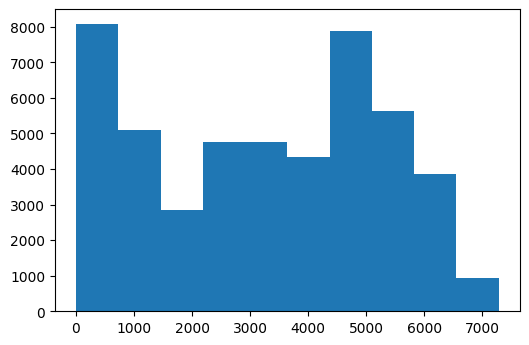

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


In [34]:
plt.hist(traffic['traffic_volume'])
plt.show()
print(traffic['traffic_volume'].describe())

There are frequently many days with few people on the road and a higher proportion of days with a normal distribution aroud 5000 vehicles. The difference in cars may correspond to time of day such as late in the night or early in the morning.

To identify more meaningful time periods, the data are broken into 7am-7pm (day) and 7pm-7am (night).

## Traffic Volume per Day and Night

Splitting data by day and night helps to differentiate when traffic may actually be heaviest

In [21]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic_day = traffic[traffic['date_time'].dt.hour.between(7,19, inclusive = 'right')]
print(traffic_day.head(10))

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   
5    None  291.72      0.0      0.0           1        Clear   
6    None  293.17      0.0      0.0           1        Clear   
7    None  293.86      0.0      0.0           1        Clear   
8    None  294.14      0.0      0.0          20       Clouds   
9    None  293.10      0.0      0.0          20       Clouds   

  weather_description           date_time  traffic_volume  
0    scattered clouds 2012-10-02 09:00:00            5545  
1       broken clouds 2012-10-02 10:00:00            4516  
2     overcast clouds 2012-10-02 11:00:00            4767  
3     overcast clouds 2012-10-02 12:00:00            50

In [22]:
traffic_night = traffic[traffic['date_time'].dt.hour.between(0,7,inclusive = "right")]
traffic_night = traffic_night.append(traffic[traffic['date_time'].dt.hour.between(19,24,inclusive = "right")])
print(traffic_night.head(10))

   holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
15    None  284.63      0.0      0.0           1        Clear   
16    None  283.47      0.0      0.0           1        Clear   
17    None  281.18      0.0      0.0           1        Clear   
18    None  281.09      0.0      0.0           1        Clear   
19    None  279.53      0.0      0.0           1        Clear   
20    None  278.62      0.0      0.0           1        Clear   
21    None  278.23      0.0      0.0           1        Clear   
35    None  284.55      0.0      0.0           1        Clear   
36    None  283.47      0.0      0.0           1        Clear   
37    None  283.17      0.0      0.0           1        Clear   

   weather_description           date_time  traffic_volume  
15        sky is clear 2012-10-03 00:00:00             506  
16        sky is clear 2012-10-03 01:00:00             321  
17        sky is clear 2012-10-03 02:00:00             273  
18        sky is clear 2012-10-03 03:00:

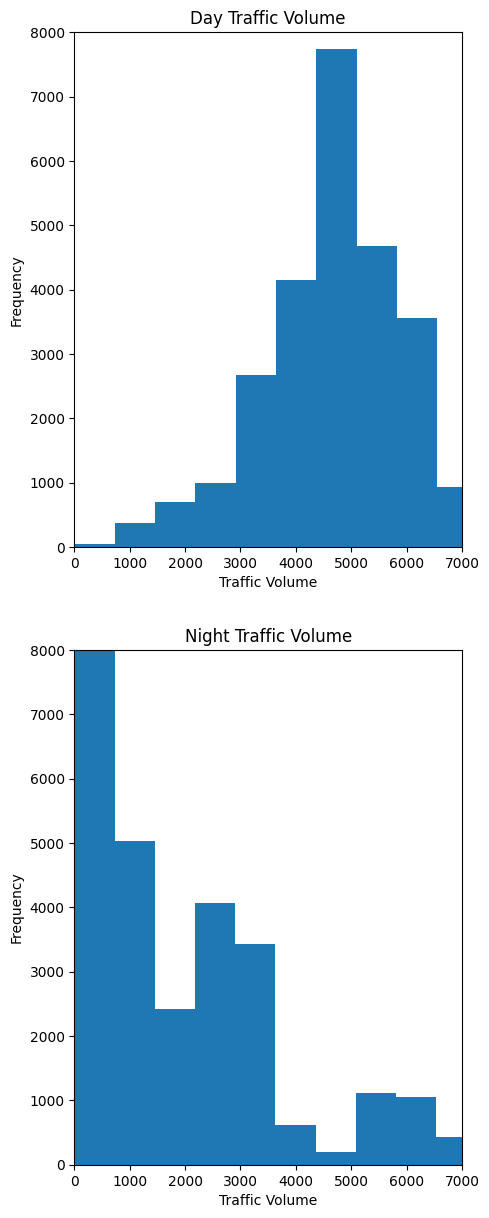

In [24]:
plt.figure(figsize=(5,15))
plt.subplot(2,1,1)
plt.hist(traffic_day['traffic_volume'])
plt.title('Day Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0,7000])
plt.ylim([0,8000])
plt.subplot(2,1,2)
plt.hist(traffic_night['traffic_volume'])
plt.title('Night Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0,7000])
plt.ylim([0,8000])
plt.show()

In [7]:
print(traffic_day['traffic_volume'].describe())
print(traffic_night['traffic_volume'].describe())

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64
count    26406.000000
mean      2018.015375
std       1713.201969
min          0.000000
25%        581.000000
50%       1485.000000
75%       2934.000000
max       7260.000000
Name: traffic_volume, dtype: float64


The day time traffic volume is skewed left shifted with the majority of volume occurring in a day. The night time traffic volume is skewed right with much less frequency of high traffic volumes.

## Traffic Volume by Month

Months with different levels of traffic may skew data, especially where people take holidays and vacations.

In [16]:
day = traffic_day.copy()
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1.0     4385.217310
2.0     4593.187798
3.0     4761.529676
4.0     4771.232816
5.0     4788.966639
6.0     4791.087488
7.0     4502.628360
8.0     4818.434690
9.0     4755.709916
10.0    4809.481678
11.0    4588.910486
12.0    4276.567081
Name: traffic_volume, dtype: float64

Text(0, 0.5, 'Average Traffic Volume')

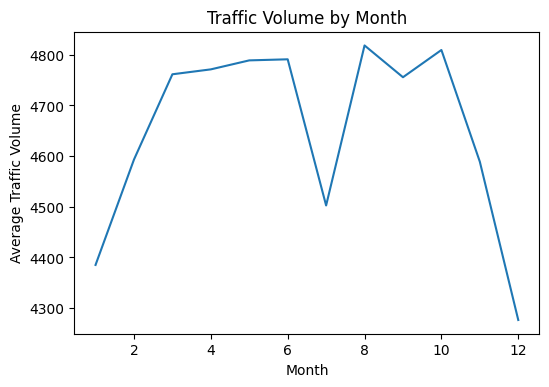

In [31]:
by_month['traffic_volume'].plot()
plt.title('Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')

Average traffic volume is very low in January, July, and December most likely due to period of vaction and holidays.

## Traffic by Day

Traffic will change during the week but most likely be lower on days where people are not working, like the weekend.

In [32]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0.0    4746.208029
1.0    5036.062431
2.0    5141.231163
3.0    5163.688063
4.0    5161.533588
5.0    3884.065668
6.0    3410.368091
Name: traffic_volume, dtype: float64

Text(0, 0.5, 'Average Traffic Volume')

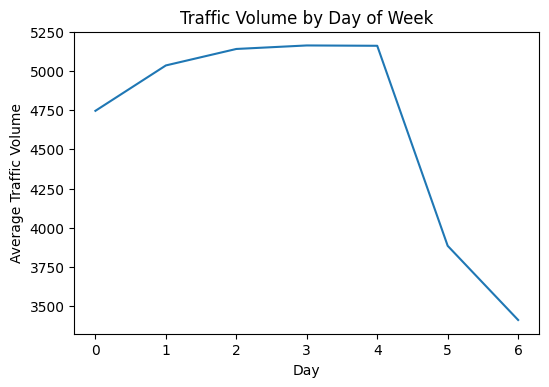

In [33]:
by_dayofweek['traffic_volume'].plot()
plt.title('Traffic Volume by Day of Week')
plt.xlabel('Day')
plt.ylabel('Average Traffic Volume')

Average volume increases towards the end of the work week and falls off during the weekend.

## Traffic by hour during the Day

For further analysis, the weekend needs to be removed because it will skew the analysis.

In [35]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7.0     6030.413559
8.0     5503.497970
9.0     4895.269257
10.0    4378.419118
11.0    4633.419470
12.0    4855.382143
13.0    4859.180473
14.0    5152.995778
15.0    5592.897768
16.0    6189.473647
17.0    5784.827133
18.0    4434.209431
19.0    3298.340426
Name: traffic_volume, dtype: float64
hour
7.0     1589.365894
8.0     2338.578073
9.0     3111.623917
10.0    3686.632302
11.0    4044.154955
12.0    4372.482883
13.0    4362.296564
14.0    4358.543796
15.0    4342.456881
16.0    4339.693805
17.0    4151.919929
18.0    3811.792279
19.0    3220.234120
Name: traffic_volume, dtype: float64


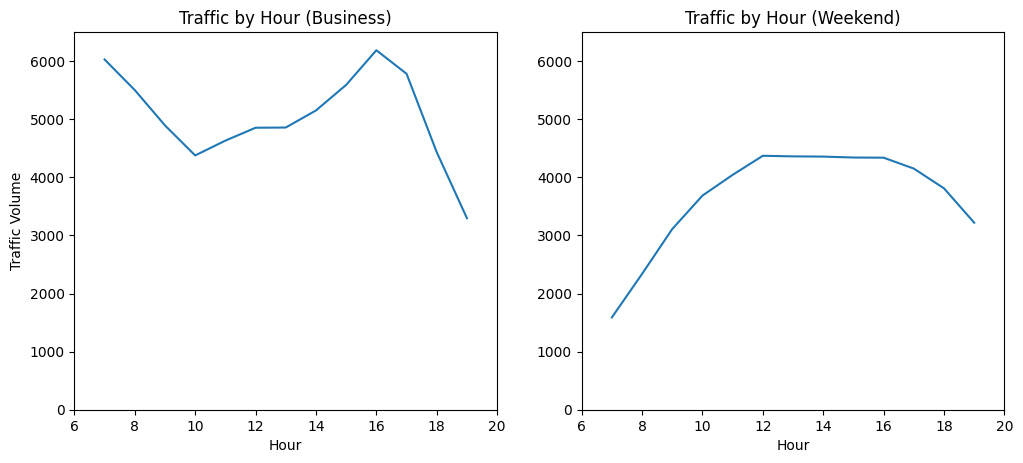

In [44]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot()
plt.title('Traffic by Hour (Business)')
plt.xlim([6,20])
plt.ylim([0,6500])
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot()
plt.title('Traffic by Hour (Weekend)')
plt.xlim([6,20])
plt.ylim([0,6500])
plt.xlabel('Hour')
plt.show()

Traffic starts high in the morning (7-9) and ends high (13-18) with a fade off after people go home on business days. Traffic is highest volume during the midday (12-16) during the weekend.

## Traffic Volume by Weather

While traffic changes based on time of day and month, other factors influence traffic volume as well. To see if weather factors influence traffic volume, different weather patterns are correlated to traffic volume.

In [48]:
day.drop(['holiday','date_time','month','dayofweek','hour'], axis=1).corrwith(day['traffic_volume']).sort_values()

clouds_all       -0.033410
snow_1h           0.003768
rain_1h           0.004020
temp              0.118084
traffic_volume    1.000000
dtype: float64

Temperature has the highest correlation with traffic volume but none have a high correlation.

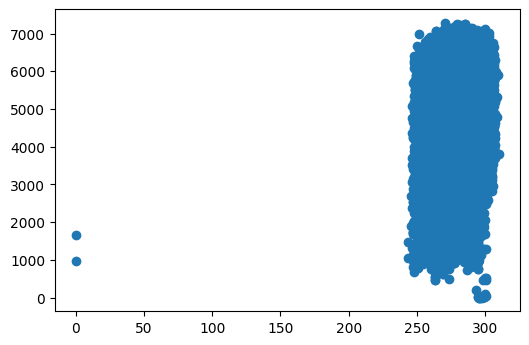

In [51]:
plt.scatter(x = day['temp'],y = day['traffic_volume'])

The correlation is low and scatter plot really has little information to show.

## Analyzing Categorical Data Relation to Traffic Volume

None of the previous correlations showed any strong relationship with traffic volume.

In [54]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

(0.0, 6000.0)

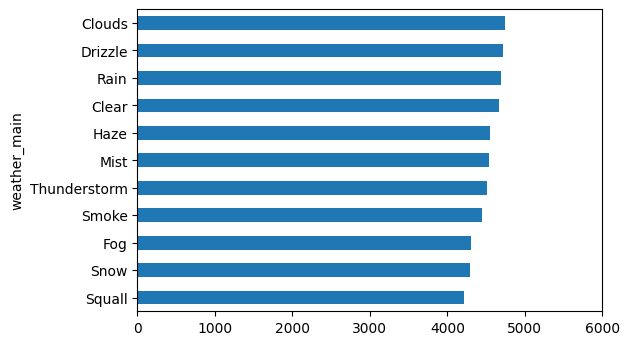

In [60]:
by_weather_main['traffic_volume'].sort_values().plot.barh()
plt.xlim([0,6000])

No traffic volume exceeds 5000 cars but clouds, drizzle, rain, and clear result in highest volumes.

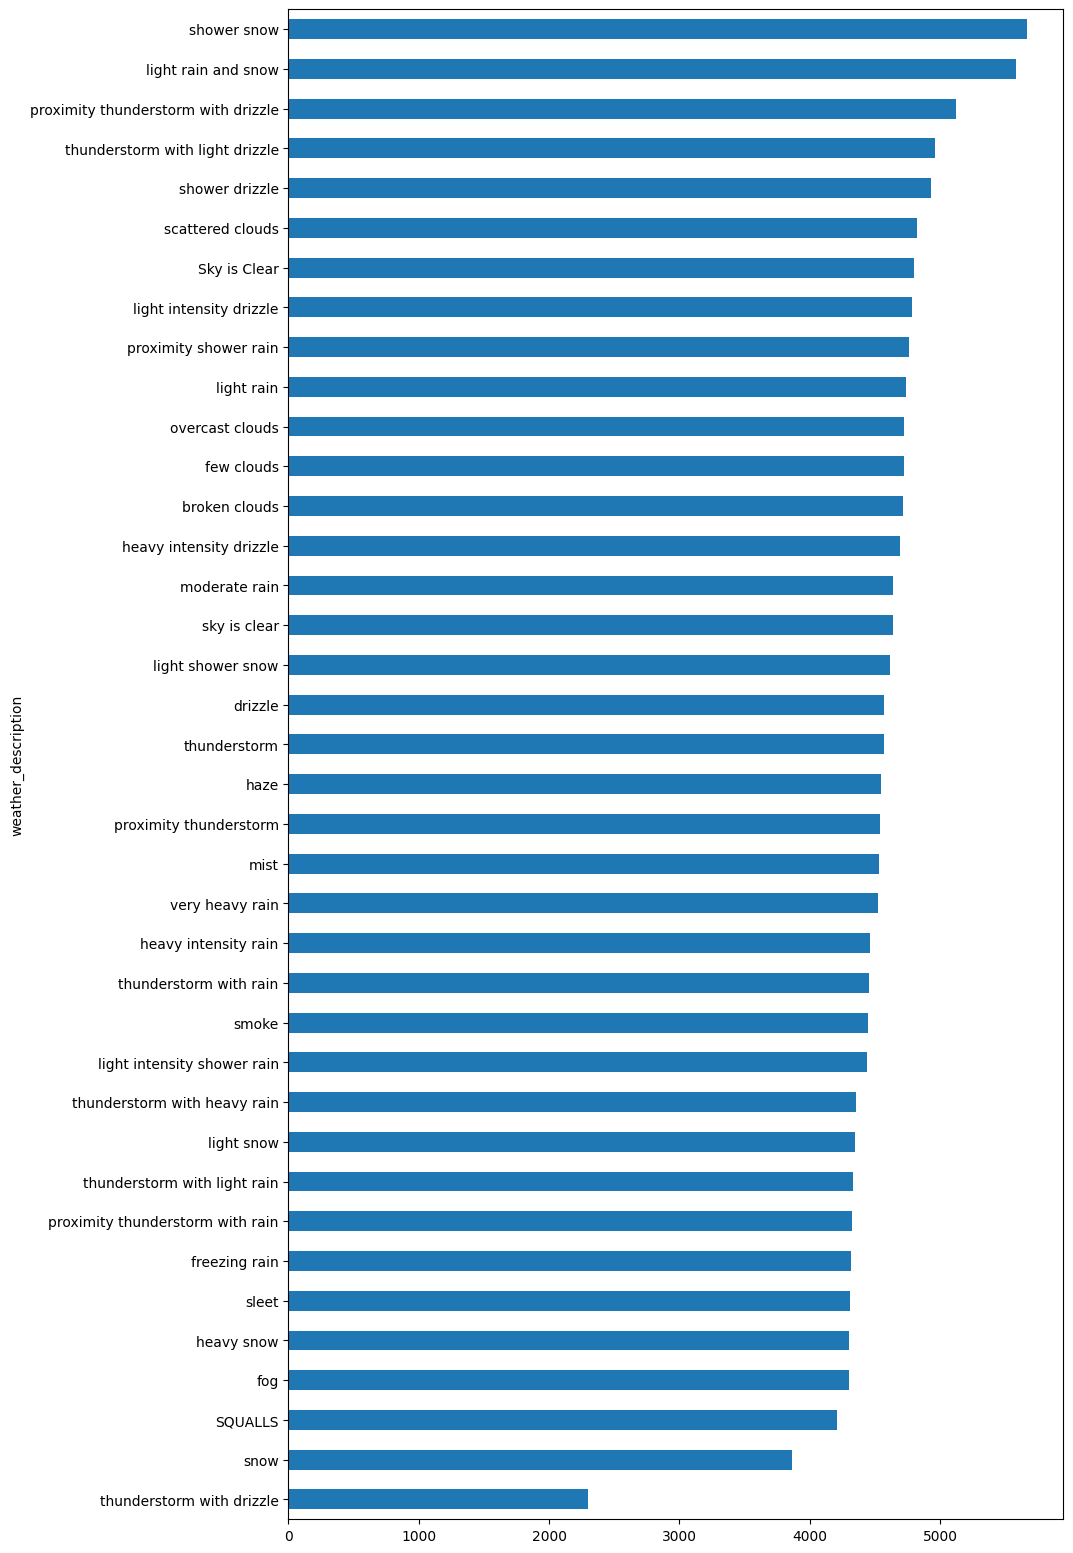

In [65]:
by_weather_description['traffic_volume'].sort_values().plot.barh(figsize=(10,20))

Both snow shower and light rain or snow show traffic volume of over 5000 cars.

## Conclusions

Traffic volume is dynamic throughout the year, week, and especially a day. Mornings and evenings tend to be highest traffic with rush hour. The winter months around the holidays are some of the lowest volumes on average when most people are not going to work. If weather is in play, light weather of rain or snow could be related to the highest traffic volume. Sunny days also relate to high voluumes since people are willing to travel.

Overall, there are many factors that are associated with traffic volume but time may be the biggest long term factor.